# Chapter 10 - Unsupervised Learning 

- [Lab 1: Principal Component Analysis](#Lab-1:-Principal-Component-Analysis)
- [Lab 2: K-Means Clustering](#Lab-2:-Clustering)
- [Lab 2: Hierarchical Clustering](#10.5.3-Hierarchical-Clustering)
- [Lab 3: NCI60 Data Example](#Lab-3:-NCI60-Data-Example)

In [ ]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

## Lab 1: Principal Component Analysis

In [ ]:
# In R, I exported the dataset to a csv file. It is part of the base R distribution.
# df = pd.read_csv('Data/USArrests.csv', index_col=0)
df = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/USArrests.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [ ]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [ ]:
#S:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [ ]:
scale(df)

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [ ]:
X
# Apparently, this is the standardized initial dataset

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530
Georgia,2.229265,0.487757,-0.386621,0.492653


In [ ]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
# S: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


#S:
Hence, the None case to "n_components" results in:

n_components == min(n_samples, n_features) - 1

In [ ]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


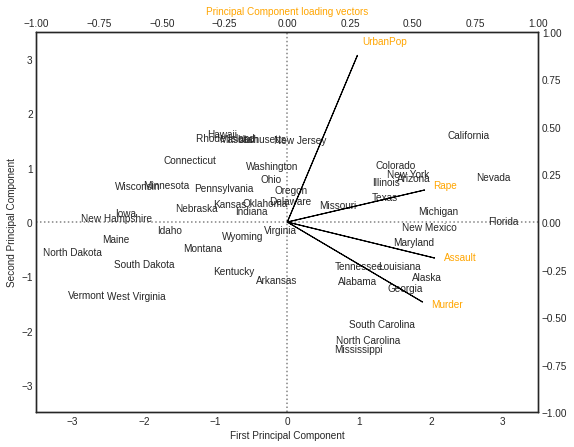

In [ ]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

# quest

#S:
FIGURE 10.1. The first two principal components for the USArrests data. The
blue state names represent the scores for the first two principal components. The
orange arrows indicate the first two principal component loading vectors (with
axes on the top and right). For example, the loading for Rape on the first component
is 0.54, and its loading on the second principal component 0.17 (the word
Rape is centered at the point (0.54, 0.17)). This figure is known as a biplot, because
it displays both the principal component scores and the principal component
loadings.

In [ ]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)
# quest

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [ ]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [ ]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

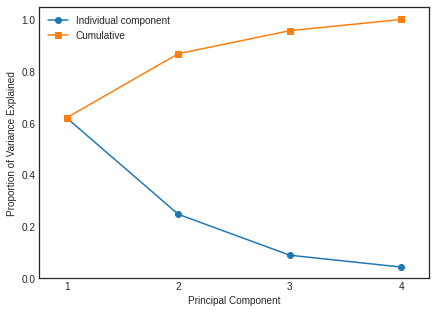

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

#S:
FIGURE 10.4. Left: a screen plot depicting the proportion of variance explained
by each of the four principal components in the USArrests data. Right: the cumulative
proportion of variance explained by the four principal components in the
USArrests data.

## Lab 2: Clustering

### 10.5.1 K-Means Clustering

In [ ]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4
#S:
#X

Text(0, 0.5, 'X2')

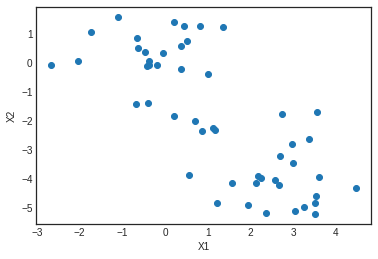

In [ ]:
#S:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1")
plt.ylabel("X2")

#### K = 2

In [ ]:
km1 = KMeans(n_clusters=2, n_init=20)
# S: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km1.fit(X)
 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

See plot for K=2 below.

####  K = 3

In [ ]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pd.Series(km2.labels_).value_counts()

2    21
1    20
0     9
dtype: int64

In [ ]:
km2.cluster_centers_

array([[ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797]])

In [ ]:
km2.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939726

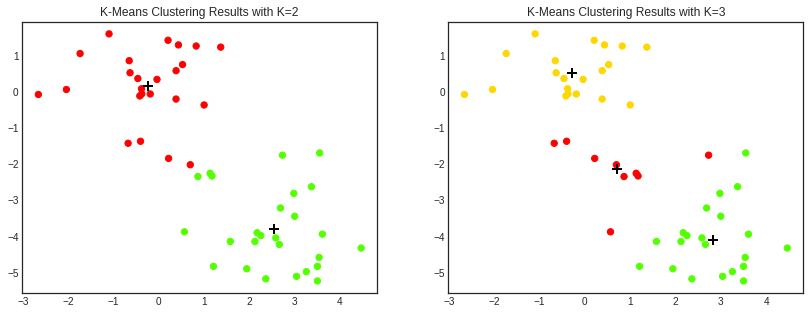

In [ ]:
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
_, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### 10.5.3 Hierarchical Clustering

#### scipy

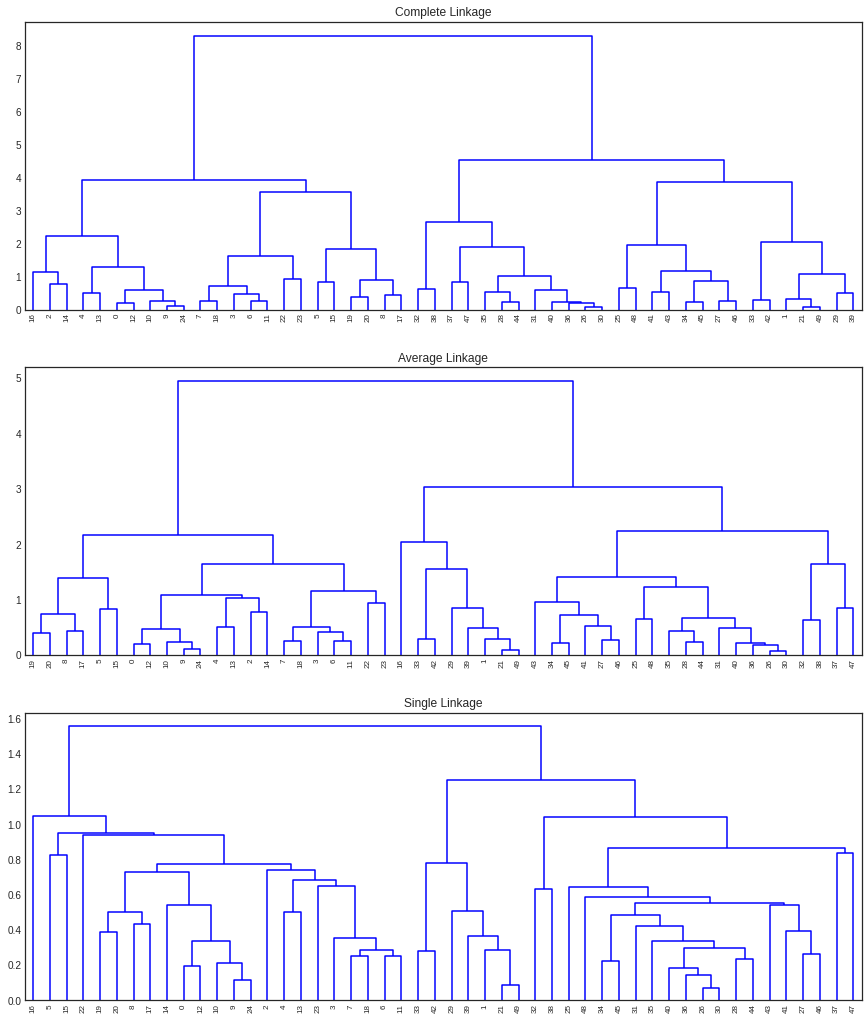

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

iterable = zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]
              )
for linkage, cluster, ax in iterable:
    # cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
    hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)


ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

In [ ]:
# Experiments with zip
a = [10, 20, 30, 40]
b = ['a', 'b', 'c', 'd', 'e']
c = ['a', 'b', 'c', 'd', 'e']

res = zip(a, b, c)

In [ ]:
for i, j, k in res:
  print(i, j, k)

10 a a
20 b b
30 c c
40 d d


In [ ]:
# Iterable can not be reused
for i, j, k in res:
  print(i, j, k)

## Lab 3: NCI60 Data Example

### § 10.6.1 PCA

In [ ]:
# In R, I exported the two elements of this ISLR dataset to csv files.
# There is one file for the features and another file for the classes/types.
# df2 = pd.read_csv('Data/NCI60_X.csv').drop('Unnamed: 0', axis=1)
df2 = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/NCI60_X.csv').drop('Unnamed: 0', axis=1)
print("df2.columns[:5] =", df2.columns[:5])
# print("dir(df2.columns[:5])", dir(df2.columns[:5]))
df2.columns = np.arange(df2.columns.size)
print("df2.info() =")
df2.info()

df2.columns[:5] = Index(['1', '2', '3', '4', '5'], dtype='object')
df2.info() =
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,-0.650000,-0.940000,0.310000,0.01501,-0.080000,-2.37,-0.540000,-0.615000,0.000000,-0.519990,-0.370000,-0.290000,-0.174990,7.000000e-02,-0.040000,0.025,-0.740000,-0.479990,-0.450000,-0.930000,0.160000,-0.550000,-0.550010,0.055000,-0.370000,-0.165000,0.210000,0.470000,0.000000,-2.602085e-18,...,0.240000,0.420000,0.100000,0.015000,0.000000,-0.204980,0.185020,4.600000e-01,0.009980,-0.020000,-0.095000,0.210020,0.030000,0.190000,-0.130000,0.124990,0.150000,0.000000,0.375029,0.475000,0.120000,0.590000,0.335000,7.800000e-01,0.410000,-0.630000,1.215000,0.192500,0.000000,-0.820010,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,-0.310039,-0.720039,-0.010039,0.00000,-0.570039,0.00,-0.470039,-0.355039,0.004981,-0.480029,-0.140039,-0.090039,0.004971,-2.200390e-01,-0.370039,0.000,-0.320039,0.159971,0.179961,-0.320039,-0.440039,0.349961,0.449951,0.104961,0.489961,0.204961,-0.050039,-0.010039,0.269961,1.996101e-02,...,0.799961,0.269961,0.479961,-0.245039,0.279961,0.014981,-0.075019,6.099610e-01,0.099941,0.629961,0.474961,0.419981,-0.170039,-0.090039,-0.170039,0.494951,-0.120039,0.679961,-0.215010,0.484961,-0.130039,0.029961,0.154961,4.399610e-01,-0.320039,0.009961,0.684961,0.572461,0.629961,-0.400049,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,0.410000,0.130000,-0.350000,0.00000,0.000000,0.00,-0.800000,0.000000,-0.004981,0.000000,-0.140000,0.050000,-0.064990,-6.000000e-02,0.290000,0.715,-0.070000,-0.089990,-0.310000,0.580000,-0.480000,0.230000,-0.040010,-0.935000,-0.750000,-0.385000,-0.340000,0.120000,-0.470000,1.700000e-01,...,0.010000,-0.190000,0.420000,0.145000,0.000000,0.065019,-0.644981,-7.000000e-02,0.000000,0.370000,0.565000,0.460019,0.320000,0.100000,0.060000,0.124990,0.270000,0.480000,0.895029,0.225000,0.300000,0.680000,0.715000,5.300000e-01,0.000000,0.120000,0.295000,0.752500,0.380000,0.000000,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,-0.010000,-0.120000,-0.210000,0.00000,0.610000,-1.02,-0.470000,0.000000,-0.764981,0.000000,-0.310000,-0.620000,-0.284990,-5.400000e-01,-0.520000,-0.135,-0.890000,-0.269990,-0.840000,-0.230000,0.320000,0.000000,0.109990,0.455000,-0.340000,-0.895000,-1.080000,-0.430000,-0.030000,-1.300000e-01,...,-0.400000,-0.470000,0.220000,-0.495000,-0.370000,-0.474981,-0.834981,-3.700000e-01,0.289980,-0.210000,-0.785000,-0.199981,0.060000,0.400000,-0.160000,0.124990,0.380000,0.750000,1.525029,0.695000,0.570000,0.200000,0.185000,-6.938894e-18,0.000000,-0.080000,-0.875000,-0.587500,-0.570000,0.439990,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,0.685000,0.605000,0.355000,1.22001,2.425000,0.00,-0.315000,0.310000,-0.519981,-0.074990,-0.865000,-0.455000,-0.499990,-2.450000e-01,-0.235000,-0.330,0.000000,0.015010,-0.105000,-0.225000,-0.105000,-0.275000,-0.575010,-0.450000,-0.465000,-0.390000,-0.995000,-0.355000,0.000000,-4.750000e-01,...,-0.175000,0.015000,1.465000,-0.060000,-0.805000,-0.719981,-2.069981,-6.950000e-01,1.464980,-0.055000,0.120000,0.095020,-0.635000,-0.195000,-0.115000,-0.190010,0.045000,-0.365000,0.150029,-0.

In [ ]:
X = pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [ ]:
X[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,-1.131964,-1.415571,0.820233,0.048805,-0.320710,-1.218518,-0.785648,-1.023926,-0.043347,-1.154356,-0.894659,-1.023372,-0.633867,0.254350,-0.145046,0.008030,-1.154356,-0.607235,-1.093944,-1.668168,0.115280,-1.406479,-0.949803,0.006209,-0.548805,-0.312554,0.603921,1.250810,0.197769,-0.005578,...,0.584818,1.141914,0.319927,0.034355,-0.231433,-0.506252,0.186955,0.844695,-0.052459,-0.072773,-0.131760,0.526308,0.246085,0.553272,-0.315848,0.128300,0.334997,0.073429,0.653259,1.036575,0.217023,0.775551,0.513161,1.100785,1.033403,-1.242515,0.647740,0.348278,0.006261,-1.016781,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,-0.616503,-1.116670,0.106235,0.018852,-0.816927,-0.348119,-0.722910,-0.538650,-0.034081,-1.058206,-0.344881,-0.375344,-0.035457,-0.818675,-0.926621,-0.049067,-0.518181,0.294210,0.318325,-0.452540,-0.837786,0.727043,0.821324,0.079718,0.763312,0.337186,0.017189,-0.129503,0.806305,0.031940,...,1.889008,0.776651,1.056650,-0.806397,0.320726,-0.004365,-0.114827,1.167423,0.015336,1.433329,1.034830,1.073271,-0.095061,0.068145,-0.394579,0.785834,-0.285866,1.055120,-0.169164,1.058743,-0.092504,0.133869,0.319360,0.639431,-0.892143,0.139625,0.291903,1.132102,1.153295,-0.542697,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,0.475247,0.038432,-0.652209,0.018852,-0.239702,-0.348119,-1.018807,0.124110,-0.052613,0.096790,-0.344788,0.078490,-0.268093,-0.226597,0.636437,1.583903,-0.139411,-0.057883,-0.780087,1.341201,-0.901258,0.442653,-0.046493,-1.450420,-1.128603,-0.698926,-0.637057,0.244413,-0.861686,0.313946,...,0.049131,-0.343104,0.940389,0.454669,-0.231433,0.109809,-0.776282,-0.295910,-0.059980,0.830942,1.219121,1.177576,0.740651,0.397360,0.057764,0.128300,0.610897,0.766427,1.378059,0.480212,0.439848,0.878671,0.922209,0.761593,-0.048010,0.377279,0.030105,1.503505,0.698165,-0.091093,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,-0.161573,-0.301288,-0.339873,0.018852,0.377988,-0.722721,-0.722875,0.124110,-1.466576,0.096790,-0.751215,-2.092826,-0.999641,-2.002400,-1.281748,-0.357390,-1.381582,-0.311430,-1.968260,-0.273096,0.369414,-0.102604,0.219187,0.594745,-0.503031,-1.594607,-2.306737,-1.337067,0.130145,-0.249920,...,-0.905789,-1.024751,0.552600,-1.614566,-0.961175,-1.122313,-0.996782,-0.941536,0.158549,-0.513045,-1.544045,-0.541772,0.297247,0.917066,-0.374839,0.128300,0.863805,1.156239,2.256182,1.526174,0.774085,0.328697,0.351695,0.042506,-0.048010,-0.054666,-0.755365,-1.260788,-1.031596,0.405601,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,0.892212,0.683901,0.920627,2.453466,2.215868,-0.348119,-0.583876,0.702795,-1.010759,-0.083644,-2.078078,-1.558099,-1.714563,-0.911021,-0.606831,-0.802746,-0.033372,0.090019,-0.320510,-0.263131,-0.305630,-0.754542,-0.994082,-0.736819,-0.693754,-0.707707,-2.114949,-1.121411,0.197769,-0.898367,...,-0.381747,0.155960,2.966583,-0.208133,-1.819114,-1.681332,-2.430033,-1.640963,1.044029,-0.153876,0.308299,0.226724,-0.888005,-0.113684,-0.286352,-0.431551,0.093585,-0.453538,0.339644,-0.087277,0.173696,0.288594,0.357077,0.0

In [ ]:
# y = pd.read_csv('Data/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [ ]:
y.type.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562A-repro    1
MCF7A-repro    1
K562B-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: type, dtype: int64

In [ ]:
sum(y.type.value_counts())


64

In [ ]:
# ---------stopped here------------------- 
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))
print("df2_plot.shape =", df2_plot.shape)
df2_plot.info()

df2_plot.shape = (64, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       64 non-null     float64
 1   1       64 non-null     float64
 2   2       64 non-null     float64
 3   3       64 non-null     float64
 4   4       64 non-null     float64
 5   5       64 non-null     float64
 6   6       64 non-null     float64
 7   7       64 non-null     float64
 8   8       64 non-null     float64
 9   9       64 non-null     float64
 10  10      64 non-null     float64
 11  11      64 non-null     float64
 12  12      64 non-null     float64
 13  13      64 non-null     float64
 14  14      64 non-null     float64
 15  15      64 non-null     float64
 16  16      64 non-null     float64
 17  17      64 non-null     float64
 18  18      64 non-null     float64
 19  19      64 non-null     float64
 20  20      64 non-null     float64
 21  21      64 non-

In [ ]:
df2_plot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,-12.445659,-20.289486,-6.531522,-3.619008,-3.795517,-6.175528,20.323433,8.841842,6.867954,5.974421,-7.297371,-7.626535,11.579865,14.517065,-7.315024,3.471365,-11.058650,-1.188230,-0.680938,3.118182,4.594605,-1.733170,-4.362994,-2.328352,-0.695952,-7.935259,0.578385,5.101596,2.345503,14.935608,3.619620,7.181807,5.004586,-3.556727,-5.038605,-0.006657,-5.845404,-2.104595,-15.227530,11.043829,9.933705,-8.415596,-3.985182,14.815565,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,-14.687849,-22.420239,-22.896399,4.094454,2.860795,5.107757,19.199121,4.828775,8.248883,17.749956,2.119007,-10.616238,4.150006,11.313757,-5.545163,-2.852702,-2.996211,-6.483383,-11.632180,12.499390,-5.257852,1.089094,1.179186,7.761211,-2.468145,-11.930721,14.394170,-4.410261,-5.975864,-3.787468,-1.637900,-0.236526,-0.910867,0.602633,2.599555,-14.755280,-5.009199,1.421521,12.286995,-3.695174,-12.495695,0.437016,-1.329423,-14.186051,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,-10.700267,0.086096,-13.741751,-11.768740,-3.855515,-7.793148,12.970847,-0.654400,-3.660780,5.634458,-1.758447,6.926401,-5.198064,0.882821,-6.959453,-8.466983,11.466070,-0.848165,-14.455113,0.621185,1.769301,0.095389,5.185175,2.303610,6.517889,1.983660,-1.052445,-2.525993,-2.250494,-18.276804,-9.157274,2.702564,-2.032333,6.182829,-4.096355,31.044710,-0.402543,-12.386239,-10.853933,-4.960728,7.587926,13.539720,-7.852833,-1.958321,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,14.292704,-6.907946,-7.385961,-9.075857,-6.791275,-21.267869,-2.876124,1.365551,3.101186,-1.101878,5.905317,-17.130806,7.611038,-16.807089,5.252865,-1.695567,10.657991,-4.559829,6.508960,-6.347748,-5.797685,-4.448954,-4.865495,-0.926582,6.065747,13.809974,-0.107666,-0.101686,6.334671,-1.629273,-6.201471,11.233016,-4.164497,4.906288,4.448081,-12.997166,1.761597,-0.397144,7.599350,-8.131831,8.951658,7.357574,16.404906,0.252930,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,2.149909,17.261820,7.036852,-12.500937,-6.453552,-4.581864,-21.105917,-17.132577,-3.891790,4.432150,4.771323,8.554628,4.415780,-10.701166,-18.642178,4.650047,12.941842,-4.163425,-13.685238,-15.035411,-7.737224,-10.484742,8.384970,4.405182,-6.833672,-13.191870,-4.696366,-10.541633,-10.409286,13.185753,-3.683127,-7.505267,-3.056435,-5.544299,-9.782250,-7.218737,-6.147234,-4.168140,0.972058,4.386434,-4.167237,-2.143408,-5.097552,1.079394,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.996242,47.242414,5.398941,-17.405145,-0.293594,-7.429801,-15.572290,22.270195,-2.897352,22.387769,-18.683084,-5.884098,-7.971345,-0.568770,4.216200,-10.165322,-12.929708,12.963485,-3.664431,0.944650,-2.136034,-6.279014,5.057763,10.840604,-6.176583,-7.156498,-8.945437,-1.422291,3.271579,0.035907,-3.795977,-4.046362,0.611608,9.226963,-10.331639,4.545752,3.532513,-2.118943,-0

labels =
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array(['CNS', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN',
       'MELANOMA', 'PROSTATE', 'LEUKEMIA', 'K562B-repro', 'K562A-repro',
       'COLON', 'MCF7A-repro', 'MCF7D-repro'], dtype=object))
norm =
norm(1) =
 0.07142857142857142
1/14 =
 0.07142857142857142
norm(100) =
 7.142857142857143


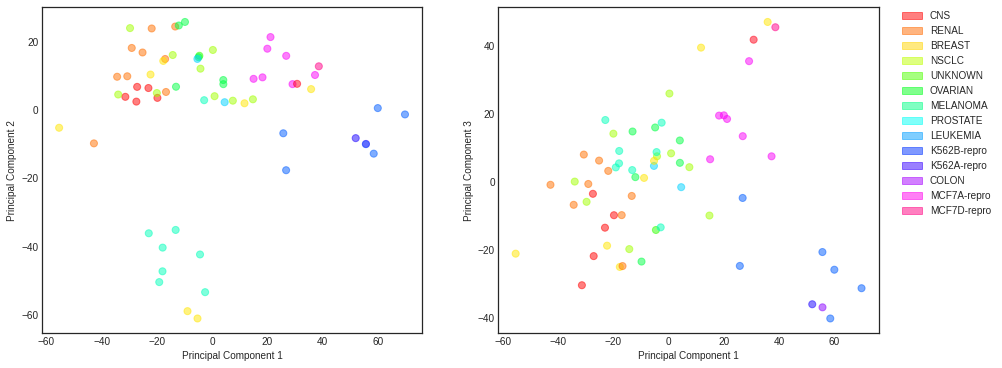

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
# What is the minus for?
ax1.set_ylabel('Principal Component 2')


# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
print("labels =\n", labels)
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
print("norm =\n", norm)
print("norm(1) =\n", norm(1))
print("1/14 =\n", 1/14)
print("norm(100) =\n", norm(100))

# Goes over all labels and their numbers
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')    

In [ ]:
labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array(['CNS', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN',
        'MELANOMA', 'PROSTATE', 'LEUKEMIA', 'K562B-repro', 'K562A-repro',
        'COLON', 'MCF7A-repro', 'MCF7D-repro'], dtype=object))

In [ ]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


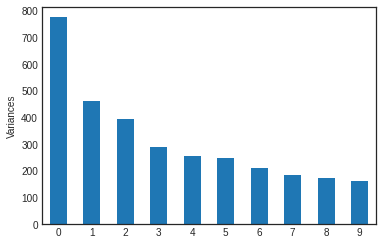

In [ ]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

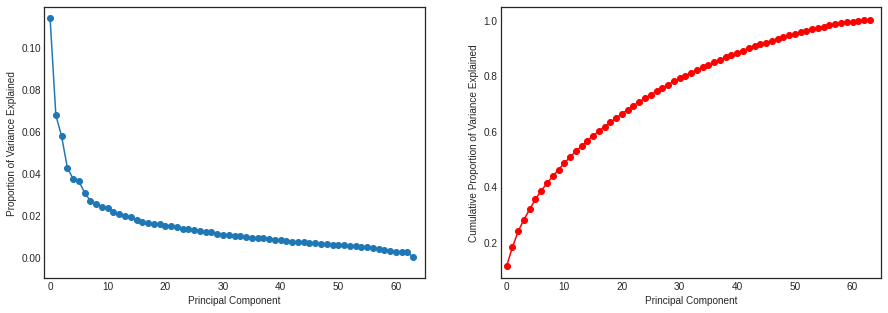

In [ ]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)    

### § 10.6.2 Clustering

In [ ]:
X= pd.DataFrame(scale(df2), index=y.type, columns=df2.columns)

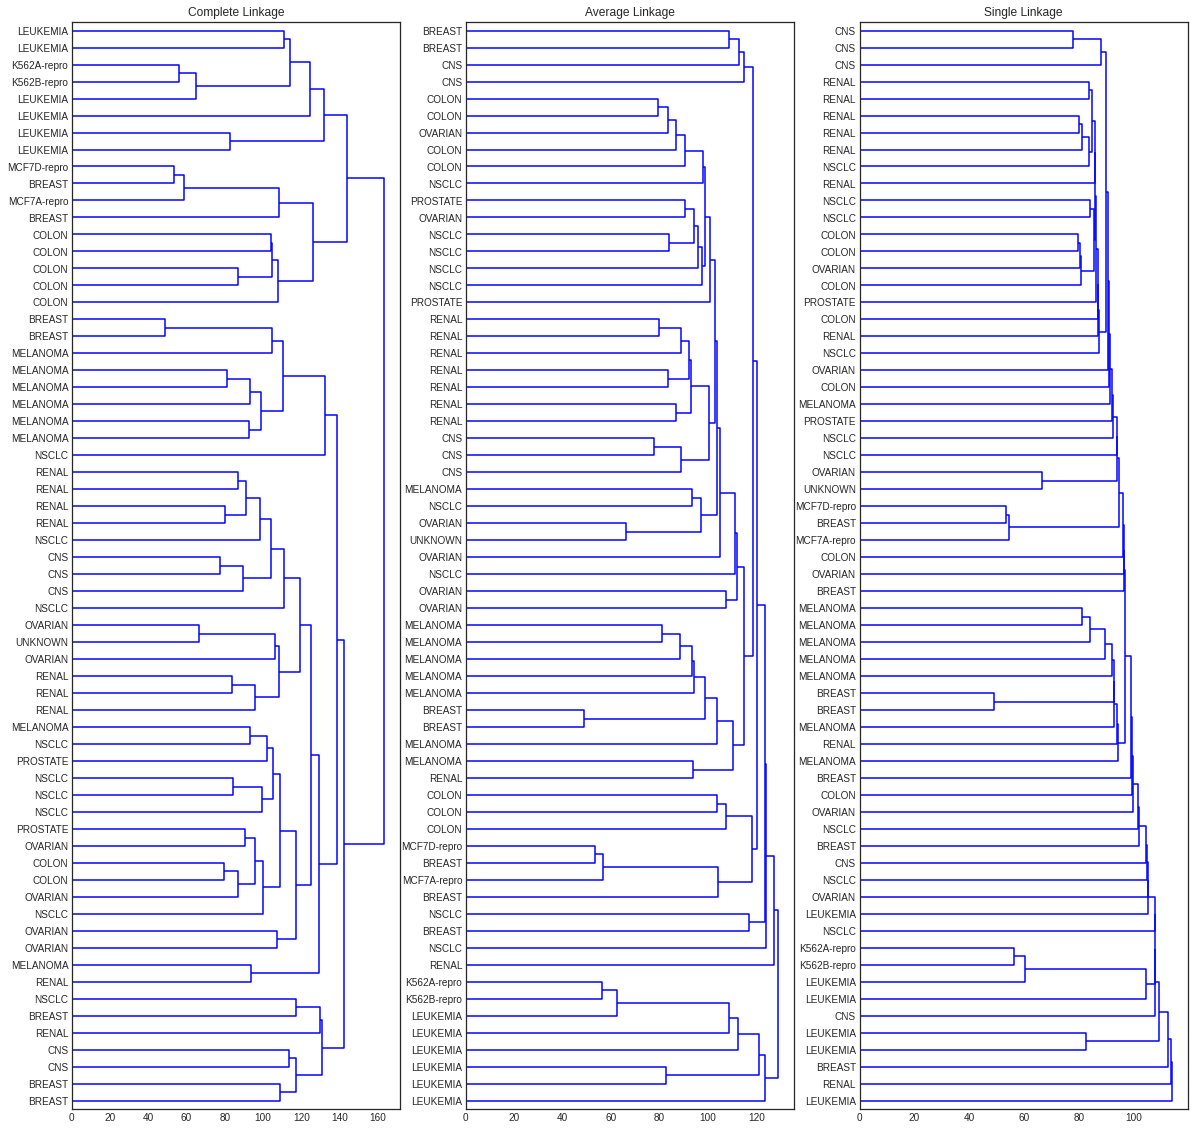

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=X.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

#S: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

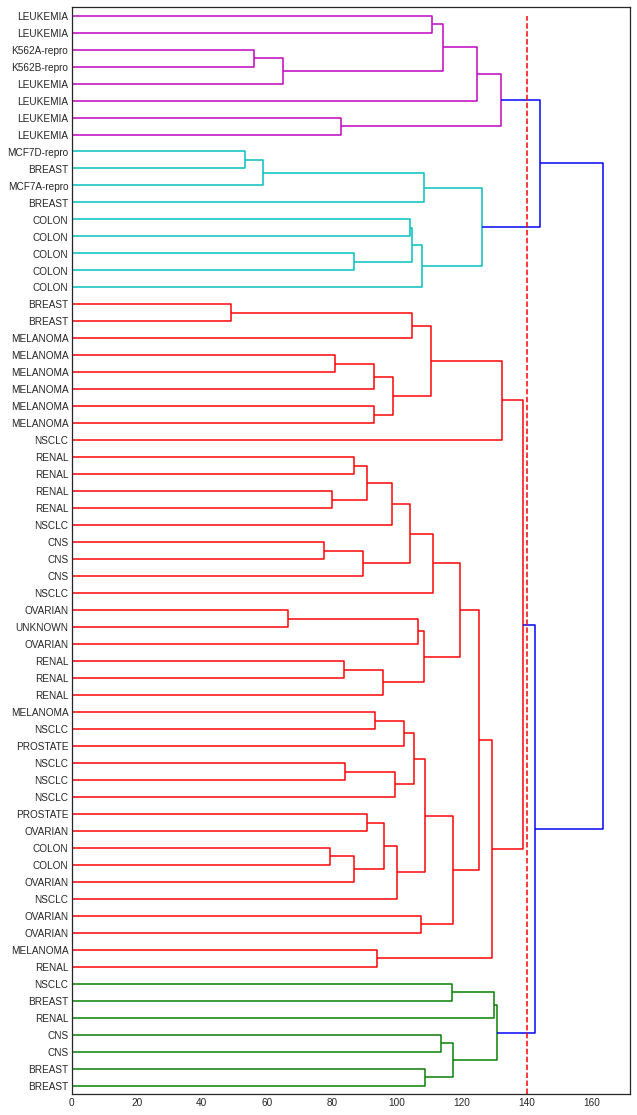

In [ ]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index, orientation='right', color_threshold=140, leaf_font_size=10)
# S: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

##### KMeans

In [ ]:
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
# S: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km4.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
# Observations per KMeans cluster
pd.Series(km4.labels_).value_counts().sort_index()

0    11
1     9
2     9
3    35
dtype: int64

##### Hierarchical

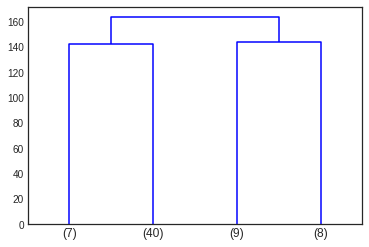

In [ ]:
# Observations per Hierarchical cluster
cut4b = hierarchy.dendrogram(hierarchy.complete(X), truncate_mode='lastp', p=4, show_leaf_counts=True)
# S: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

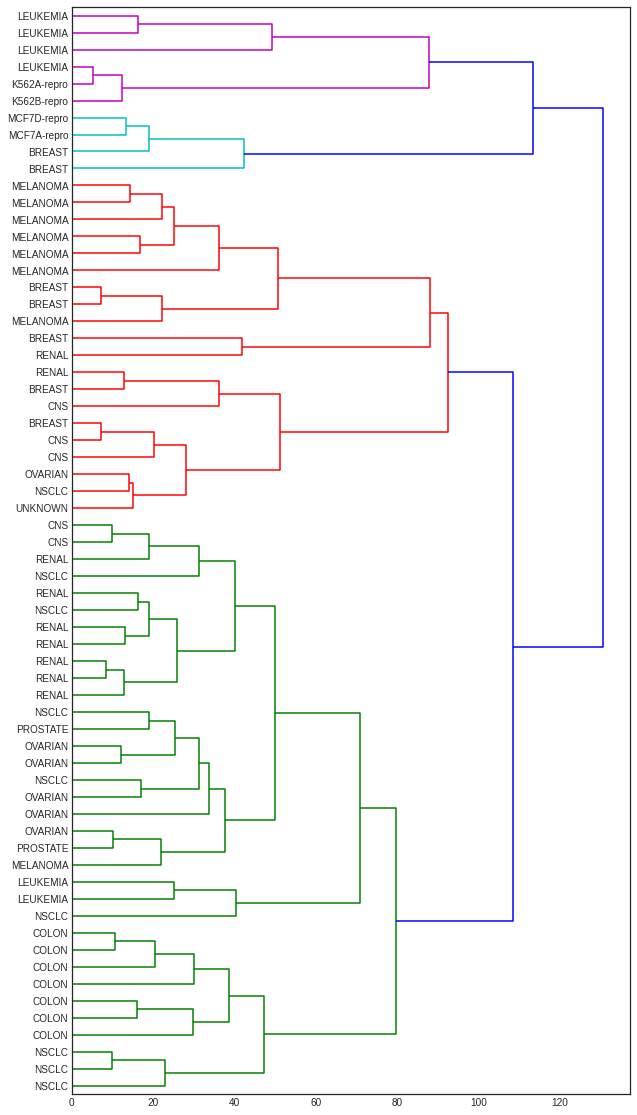

In [ ]:
# Hierarchy based on Principal Components 1 to 5
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), labels=y.type.values, orientation='right', color_threshold=100, leaf_font_size=10)
# S: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

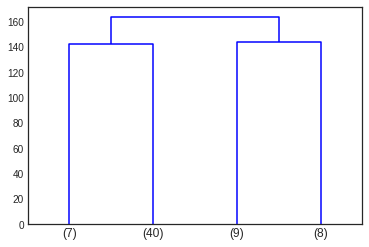

In [ ]:
cut4c = hierarchy.dendrogram(hierarchy.complete(df2_plot), truncate_mode='lastp', p=4,
                             show_leaf_counts=True)
# S: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
# See also color coding in plot above.